<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%A0%D0%9A2/RK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Рубежный контроль №2

Столярова Ольга РТ5-61Б

Вариант 16

### Задание

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Метод 1 - Дерево решений

Метод 2 - Градиентный бустинг

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pd.options.display.float_format = '{:.0f}'.format

## Загрузка данных

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename = '/content/drive/MyDrive/RK2.csv'

In [7]:
df = pd.read_csv(filename, sep=',')

In [8]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,14150429222,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,14157240859,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,14154878161,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


### Обработка пропусков

In [10]:
df.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [12]:
df.shape

(53973, 23)

In [14]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 53973


In [17]:
df = df.dropna(axis=0, how='any')
df.shape

(6566, 23)

In [19]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
11,4794,VICTOR'S,210 TOWNSEND St,San Francisco,CA,94107,38,-122,"{'type': 'Point', 'coordinates': [-122.393089,...",14155607018,...,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,34,2,9,6,28856,34
172,63652,SFDH - Banquet Main Kitchen,450 Powell St 2nd Floor,San Francisco,CA,94102,38,-122,"{'type': 'Point', 'coordinates': [-122.408507,...",14155397755,...,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,6,1,10,5,28852,8
327,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,38,-122,"{'type': 'Point', 'coordinates': [-122.432584,...",14155538905,...,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,41,9,11,15,29490,39
372,2684,ERIC'S RESTAURANT,1500 Church St,San Francisco,CA,94131,38,-122,"{'type': 'Point', 'coordinates': [-122.426995,...",14155280919,...,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,22,7,5,2,63,22
397,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,38,-122,"{'type': 'Point', 'coordinates': [-122.432584,...",14155538905,...,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,41,9,11,15,29490,39


## Кодируем категориальные признаки

Удалим колонки, которые не влияют на целевой признак:

In [20]:
df = df.drop(columns='business_name')
df = df.drop(columns='business_address')
df = df.drop(columns='business_city')
df = df.drop(columns='business_state')
df = df.drop(columns='business_location')
df = df.drop(columns='business_phone_number')
df = df.drop(columns='violation_description')

In [22]:
df.shape

(6566, 16)

In [24]:
df.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
11,4794,94107,38,-122,4794_20181030,2018-10-30T00:00:00.000,71,Routine - Unscheduled,4794_20181030_103138,Low Risk,34,2,9,6,28856,34
172,63652,94102,38,-122,63652_20190904,2019-09-04T00:00:00.000,94,Routine - Unscheduled,63652_20190904_103133,Moderate Risk,6,1,10,5,28852,8
327,328,94115,38,-122,328_20161122,2016-11-22T00:00:00.000,81,Routine - Unscheduled,328_20161122_103103,High Risk,41,9,11,15,29490,39
372,2684,94131,38,-122,2684_20190715,2019-07-15T00:00:00.000,87,Routine - Unscheduled,2684_20190715_103109,High Risk,22,7,5,2,63,22
397,328,94115,38,-122,328_20161122,2016-11-22T00:00:00.000,81,Routine - Unscheduled,328_20161122_103149,Low Risk,41,9,11,15,29490,39


## Кодируем категориальные признаки

In [25]:
df.dtypes

business_id                    int64
business_postal_code          object
business_latitude            float64
business_longitude           float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df_int = le.fit_transform(df['business_postal_code'])
df['business_postal_code'] = df_int
df_int = le.fit_transform(df['inspection_id'])
df['inspection_id'] = df_int
df_int = le.fit_transform(df['inspection_date'])
df['inspection_date'] = df_int
df_int = le.fit_transform(df['inspection_type'])
df['inspection_type'] = df_int
df_int = le.fit_transform(df['violation_id'])
df['violation_id'] = df_int
df_int = le.fit_transform(df['risk_category'])
df['risk_category'] = df_int
df.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
11,4794,5,38,-122,829,440,71,0,2734,1,34,2,9,6,28856,34
172,63652,1,38,-122,1335,604,94,0,3895,2,6,1,10,5,28852,8
327,328,13,38,-122,564,28,81,0,1925,0,41,9,11,15,29490,39
372,2684,22,38,-122,405,576,87,0,1406,0,22,7,5,2,63,22
397,328,13,38,-122,564,28,81,0,1929,1,41,9,11,15,29490,39


## Масштабируем числовые данные

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
sc1 = MinMaxScaler()
df['business_id'] = sc1.fit_transform(df[['business_id']])
df['business_latitude'] = sc1.fit_transform(df[['business_latitude']])
df['business_longitude'] = sc1.fit_transform(df[['business_longitude']])
df['inspection_score'] = sc1.fit_transform(df[['inspection_score']])
df['Neighborhoods (old)'] = sc1.fit_transform(df[['Neighborhoods (old)']])
df['Police Districts'] = sc1.fit_transform(df[['Police Districts']])
df['Supervisor Districts'] = sc1.fit_transform(df[['Supervisor Districts']])
df['Fire Prevention Districts'] = sc1.fit_transform(df[['Fire Prevention Districts']])
df['Zip Codes'] = sc1.fit_transform(df[['Zip Codes']])
df['Analysis Neighborhoods'] = sc1.fit_transform(df[['Analysis Neighborhoods']])
df.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
11,0,5,1,1,829,440,0,0,2734,1,1,0,1,0,1,1
172,1,1,1,1,1335,604,1,0,3895,2,0,0,1,0,1,0
327,0,13,1,1,564,28,1,0,1925,0,1,1,1,1,1,1
372,0,22,0,1,405,576,1,0,1406,0,1,1,0,0,0,1
397,0,13,1,1,564,28,1,0,1929,1,1,1,1,1,1,1


## Делим выборку на обучающую и тестовую

In [32]:
target = df['risk_category']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    df, target, test_size=0.2, random_state=1)

In [33]:
data_X_train.shape, data_y_train.shape

((5252, 16), (5252,))

In [34]:
data_X_test.shape, data_y_test.shape

((1314, 16), (1314,))

In [35]:
np.unique(target)

array([0, 1, 2])

## Градиентный бустинг

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [38]:
ab1 = AdaBoostClassifier()
ab1.fit(data_X_train, data_y_train)

AdaBoostClassifier()

In [39]:
data_y_pred_1 = ab1.predict(data_X_test)

In [40]:
data_y_pred_1_0 = ab1.predict(data_X_train)

In [43]:
accuracy_score(data_y_train, data_y_pred_1_0)

1.0

In [44]:
accuracy_score(data_y_test, data_y_pred_1)

1.0

In [47]:

f1_score(data_y_test, data_y_pred_1, average='micro')

1.0

In [48]:
f1_score(data_y_test, data_y_pred_1, average='macro')

1.0

In [76]:

f1_score(data_y_train, data_y_pred_1_0, average='weighted')

1.0

In [74]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [77]:
print_metrics(data_y_train, data_y_pred_1_0)

R^2: 1.0
RMSE: 0.0
MAE: 0.0


## Дерево решений

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3

In [58]:
regr5 = DecisionTreeRegressor(max_depth=3)
model5 = regr5.fit(data_X_train, data_y_train)

In [78]:
data_y_pred_2 = model5.predict(data_X_test)

Выведем основную статистику для дерева:

In [59]:
stat_tree(model5)

Всего узлов: 5
Листовых узлов: 3
Глубина дерева: 2
Минимальная глубина листьев дерева: 1
Средняя глубина листьев дерева: 1.6666666666666667


### График важности признаков:

In [63]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [64]:
list(zip(df.columns.values, model5.feature_importances_))

[('business_id', 0.0),
 ('business_postal_code', 0.0),
 ('business_latitude', 0.0),
 ('business_longitude', 0.0),
 ('inspection_id', 0.0),
 ('inspection_date', 0.0),
 ('inspection_score', 0.0),
 ('inspection_type', 0.0),
 ('violation_id', 0.0),
 ('risk_category', 1.0),
 ('Neighborhoods (old)', 0.0),
 ('Police Districts', 0.0),
 ('Supervisor Districts', 0.0),
 ('Fire Prevention Districts', 0.0),
 ('Zip Codes', 0.0),
 ('Analysis Neighborhoods', 0.0)]

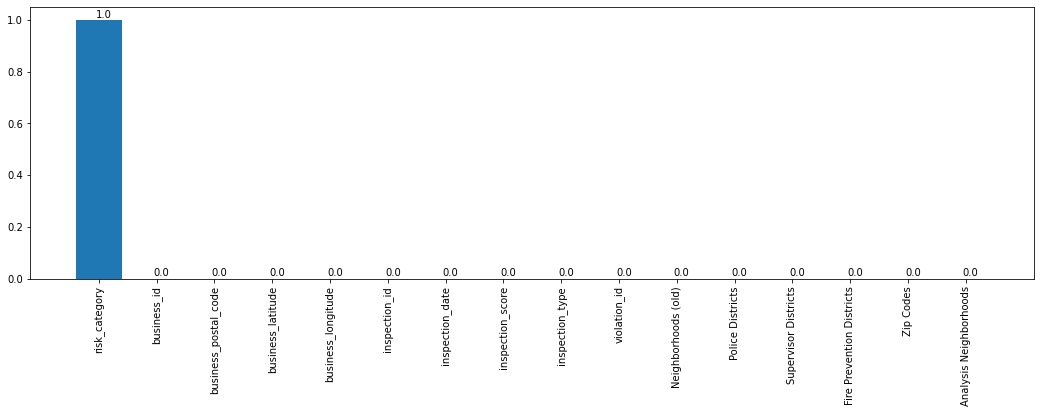

In [65]:
car_tree_cl_fl_1, car_tree_cl_fd_1 = draw_feature_importances(model5, df)

In [67]:
accuracy_score(data_y_test, data_y_pred_1)

1.0

In [79]:

f1_score(data_y_test, data_y_pred_2, average='micro')

1.0

In [80]:

f1_score(data_y_test, data_y_pred_2, average='macro')

1.0

In [81]:
f1_score(data_y_test, data_y_pred_2, average='weighted')

1.0

In [82]:
print_metrics(data_y_test, data_y_pred_2)

R^2: 1.0
RMSE: 0.0
MAE: 0.0
